In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
confusion_matrix,
classification_report,
accuracy_score,
precision_score,
recall_score,
f1_score,
roc_curve,
roc_auc_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# **1|**

# 1.2

In [217]:
df = sns.load_dataset('titanic')
print(df.shape)
print(df.head())

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# **2|**

# 2.1

1.1

In [218]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


1.2

In [220]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


1.3

In [221]:
print(f"Ogółem przeżyło: {df['survived'].mean():.1%}")
print(f"\nWedług płci:")
print(df.groupby('sex')['survived'].mean())

Ogółem przeżyło: 38.4%

Według płci:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


1.4

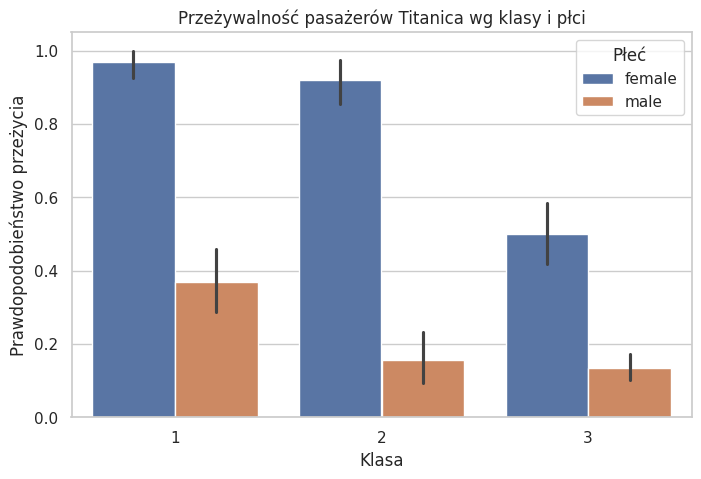

In [222]:
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="pclass",
    y="survived",
    hue="sex",
    estimator="mean"
)

plt.title("Przeżywalność pasażerów Titanica wg klasy i płci")
plt.ylabel("Prawdopodobieństwo przeżycia")
plt.xlabel("Klasa")
plt.legend(title="Płeć")
plt.show()

# 2.2

2.1

In [223]:
df.drop(['deck', 'alive'], axis=1, inplace=True)

2.2

In [224]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])


2.3

In [225]:
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who', 'embark_town'], drop_first=True)

2.4

In [226]:
y = df['survived']
X = df.drop('survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



# 2.3

3.1

In [227]:
model = LogisticRegression(
    max_iter=1000
)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

3.2

In [228]:
coef_df = pd.DataFrame({ 'feature': X_train.columns, 'coef': model.coef_[0] })

print(coef_df)

                    feature      coef
0                    pclass -0.847552
1                       age -0.023303
2                     sibsp -0.509113
3                     parch -0.298698
4                      fare  0.002533
5                adult_male -1.234060
6                     alone -0.474863
7                  sex_male -0.362352
8                embarked_Q  0.111482
9                embarked_S -0.170207
10             class_Second -0.145808
11              class_Third -0.345543
12                  who_man -1.234060
13                who_woman  0.127625
14   embark_town_Queenstown  0.111482
15  embark_town_Southampton -0.170207


3.3

In [229]:
coef_df['oddsR'] = np.exp(coef_df['coef'])
print(coef_df.sort_values('oddsR', ascending=False))

                    feature      coef     oddsR
13                who_woman  0.127625  1.136127
8                embarked_Q  0.111482  1.117934
14   embark_town_Queenstown  0.111482  1.117934
4                      fare  0.002533  1.002536
1                       age -0.023303  0.976966
10             class_Second -0.145808  0.864323
9                embarked_S -0.170207  0.843490
15  embark_town_Southampton -0.170207  0.843490
3                     parch -0.298698  0.741784
11              class_Third -0.345543  0.707836
7                  sex_male -0.362352  0.696037
6                     alone -0.474863  0.621970
2                     sibsp -0.509113  0.601028
0                    pclass -0.847552  0.428463
5                adult_male -1.234060  0.291108
12                  who_man -1.234060  0.291108


Odds ratio w przypadku sex_male wskazuje, że mężczyźni mieli mniejsze szanse na przeżycie.

# 2.4

4.1

In [230]:
pred = model.predict(X_test)

4.2

In [231]:
macierz_konfuzji = confusion_matrix(y_test, pred)
print(macierz_konfuzji)

[[98 12]
 [18 51]]


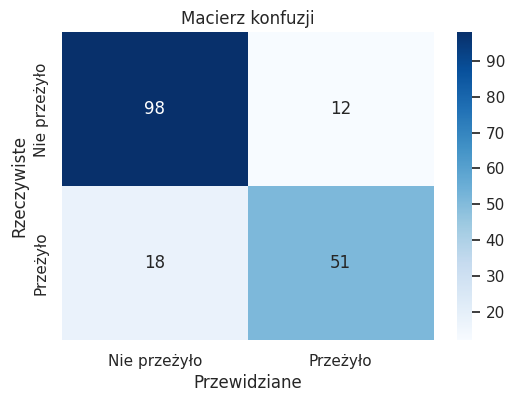

In [232]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    macierz_konfuzji,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Nie przeżyło', 'Przeżyło'],
    yticklabels=['Nie przeżyło', 'Przeżyło']
)
plt.xlabel('Przewidziane')
plt.ylabel('Rzeczywiste')
plt.title('Macierz konfuzji')
plt.show()

4.3

In [233]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

TN, FP, FN, TP = macierz_konfuzji.ravel()
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.83
Precision: 0.81
Recall: 0.74
F1 Score: 0.77
Specificity: 0.89


Accuracy wskazuje, że 83% przypadków jest klasyfikowane poprawnie.
Dzięki Precision wiemy, że w 81% przypadków model ma rację - mało FP.
Recall na poziomie 74% określa, przeoczenie ponad ćwierci FN.
F1-score wskazuje równowagę między Recall i Precision.
Specificity 0.89 pokazuje, że jest mało FP.

4.4

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

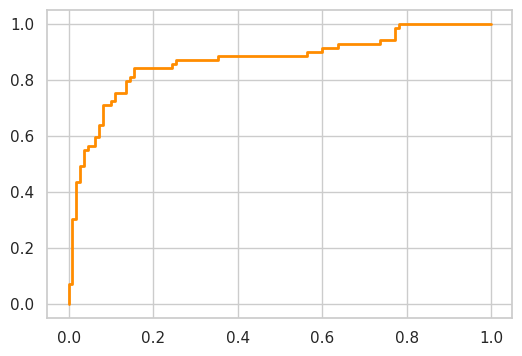

In [234]:
prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt

In [235]:
auc = roc_auc_score(y_test, prob)
print(auc)

0.869038208168643


4.5
Skoro sprawdzamy przeżywalność pasażerów to za najważniejszą metrykę w tym problemie uważam Recall ponieważ część osób, które przeżyły zostały niepoprawnie zaklasyfikowane, co ostatecznie może prowadzić do wyższej liczby osób, które przeżyły niż otrzymana z modelu.

# 2.5

5.1

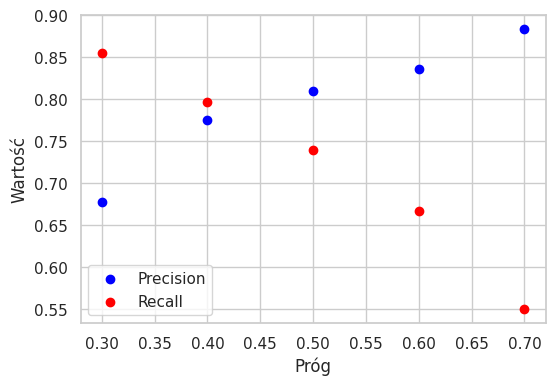

In [236]:
thresholds = [0.3,0.4,0.5,0.6,0.7]
precisions = []
recalls = []

for t in thresholds:
  pred_t = (prob >= t).astype(int)
  precisions.append(precision_score(y_test, pred_t))
  recalls.append(recall_score(y_test, pred_t))

plt.figure(figsize=(6, 4))
plt.scatter(thresholds, precisions, color='blue', label='Precision')
plt.scatter(thresholds, recalls, color='red', label='Recall')
plt.xlabel('Próg')
plt.ylabel('Wartość')
plt.legend()
plt.show()

5.2

In [237]:
model_balanced = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

model_balanced.fit(X_train, y_train)

pred_balanced = model_balanced.predict(X_test)
prob_balanced = model_balanced.predict_proba(X_test)[:, 1]

accuracy_balanced = accuracy_score(y_test, pred_balanced)
precision_balanced = precision_score(y_test, pred_balanced)
recall_balanced = recall_score(y_test, pred_balanced)
f1_balanced = f1_score(y_test, pred_balanced)

print("Balanced")
print(f"Accuracy: {accuracy_balanced:.2f}")
print(f"Precision: {precision_balanced:.2f}")
print(f"Recall: {recall_balanced:.2f}")
print(f"F1 Score: {f1_balanced:.2f}")
print("-------------------------------------")
print("Model bazowy")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Balanced
Accuracy: 0.83
Precision: 0.77
Recall: 0.81
F1 Score: 0.79
-------------------------------------
Model bazowy
Accuracy: 0.83
Precision: 0.81
Recall: 0.74
F1 Score: 0.77


6.1

In [238]:
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(max_iter=1000))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

6.2

In [239]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
all_auc = []
all_beta = []

for c in C:
  pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=c, penalty='l2', max_iter=1000))])
  pipe.fit(X_train, y_train)
  proba = pipe.predict_proba(X_test)[:, 1]
  auc = roc_auc_score(y_test, proba)
  betas = pipe.named_steps['logreg'].coef_[0]
  beta_sum = np.sum(np.abs(betas))
  all_auc.append(auc)
  all_beta.append(beta_sum)
  print(f"C: {c}, AUC: {auc}, Suma wartości bezwzgl wsp: {beta_sum}")
  print()


C: 0.001, AUC: 0.8450592885375494, Suma wartości bezwzgl wsp: 0.829912723535718

C: 0.01, AUC: 0.8602108036890644, Suma wartości bezwzgl wsp: 2.3341782317858515

C: 0.1, AUC: 0.8685111989459816, Suma wartości bezwzgl wsp: 3.7460797798534458

C: 1, AUC: 0.8690382081686429, Suma wartości bezwzgl wsp: 4.22757481948332

C: 10, AUC: 0.8691699604743084, Suma wartości bezwzgl wsp: 4.313896281990906

C: 100, AUC: 0.8691699604743084, Suma wartości bezwzgl wsp: 4.325272774238357



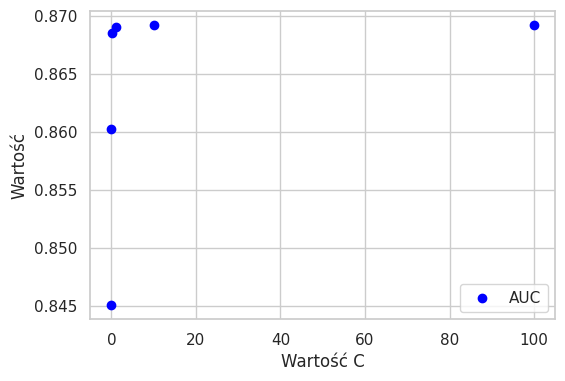

In [241]:
plt.figure(figsize=(6, 4))
plt.scatter(C, all_auc, color='blue', label='AUC')
plt.xlabel('Wartość C')
plt.ylabel('Wartość')
plt.legend()
plt.show()

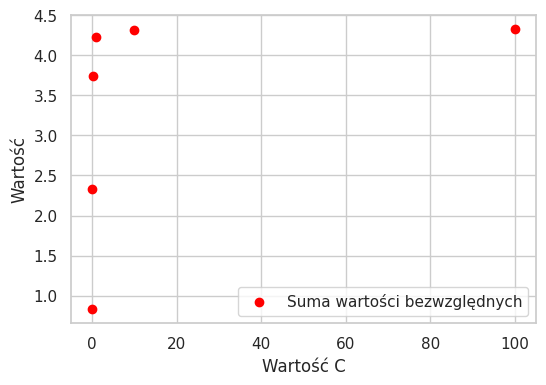

In [242]:
plt.figure(figsize=(6, 4))
plt.scatter(C, all_beta, color='red', label='Suma wartości bezwzględnych')
plt.xlabel('Wartość C')
plt.ylabel('Wartość')
plt.legend()
plt.show()

6.3

In [244]:
pipe_l2 = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=0.1, penalty='l2', max_iter=1000))])
pipe_l2.fit(X_train, y_train)

pipe_l1 = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000))])
pipe_l1.fit(X_train, y_train)

coef_l2 = pipe_l2.named_steps['logreg'].coef_[0]
coef_l1 = pipe_l1.named_steps['logreg'].coef_[0]

df_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coef_l2': coef_l2,
    'coef_l1': coef_l1
})

df_coef

,feature,coef_l2,coef_l1
0,pclass,-0.481025,-0.734078
1,age,-0.268819,-0.113277
2,sibsp,-0.413447,-0.274341
3,parch,-0.207773,-0.076805
4,fare,0.127894,0.036806
5,adult_male,-0.526615,-0.918434
6,alone,-0.171800,0.000000
7,sex_male,-0.234889,-0.142779
8,embarked_Q,0.021536,0.000000
9,embarked_S,-0.086893,-0.134269
